# Teclov : Visualising Time Series Data

In the section, we will explore ways to visualise data gathered over time. We will:
- Plot simple time series plots
- Derive variables such as month and year and use them for richer visualisations



In [23]:
# loading libraries and reading the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme if you prefer
sns.set(style="white")

# read data
market_df = pd.read_csv("./global_sales_data/market_fact.csv")
customer_df = pd.read_csv("./global_sales_data/cust_dimen.csv")
product_df = pd.read_csv("./global_sales_data/prod_dimen.csv")
shipping_df = pd.read_csv("./global_sales_data/shipping_dimen.csv")
orders_df = pd.read_csv("./global_sales_data/orders_dimen.csv")

## Visualising Simple Time Series Data

Let's say you want to visualise numeric variables such as ```Sales```, ```Profit```, ```Shipping_Cost``` etc. over time. 

In [2]:
market_df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


Since the ```Order_Date``` variable is in the orders dataframe, let's merge it.

In [3]:
# merging with the Orders data to get the Date column
df = pd.merge(market_df, orders_df, how='inner', on='Ord_id')
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Order_ID,Order_Date,Order_Priority
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,36262,27-07-2010,NOT SPECIFIED
1,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,36262,27-07-2010,NOT SPECIFIED
2,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,36262,27-07-2010,NOT SPECIFIED
3,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,20513,07-07-2009,HIGH
4,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,39682,09-11-2010,MEDIUM


In [4]:
# Now we have the Order_Date in the df
# It is stored as a string (object) currently
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ord_id               8399 non-null   object 
 1   Prod_id              8399 non-null   object 
 2   Ship_id              8399 non-null   object 
 3   Cust_id              8399 non-null   object 
 4   Sales                8399 non-null   float64
 5   Discount             8399 non-null   float64
 6   Order_Quantity       8399 non-null   int64  
 7   Profit               8399 non-null   float64
 8   Shipping_Cost        8399 non-null   float64
 9   Product_Base_Margin  8336 non-null   float64
 10  Order_ID             8399 non-null   int64  
 11  Order_Date           8399 non-null   object 
 12  Order_Priority       8399 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 853.1+ KB


Since ```Order_Date``` is a string, we need to convert it into a ```datetime``` object. You can do that using ```pd.to_datetime()```. 

In [5]:
# Convert Order_Date to datetime type
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Order_Date is now datetime type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Ord_id               8399 non-null   object        
 1   Prod_id              8399 non-null   object        
 2   Ship_id              8399 non-null   object        
 3   Cust_id              8399 non-null   object        
 4   Sales                8399 non-null   float64       
 5   Discount             8399 non-null   float64       
 6   Order_Quantity       8399 non-null   int64         
 7   Profit               8399 non-null   float64       
 8   Shipping_Cost        8399 non-null   float64       
 9   Product_Base_Margin  8336 non-null   float64       
 10  Order_ID             8399 non-null   int64         
 11  Order_Date           8399 non-null   datetime64[ns]
 12  Order_Priority       8399 non-null   object        
dtypes: datetime64[ns](1), float64(5),

C:\Users\aiman\AppData\Local\Temp\ipykernel_48052\220854924.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order_Date'] = pd.to_datetime(df['Order_Date'])


Now, since on each day, multiple orders were placed, we need to aggregate ```Sales``` using a metric such as mean, median etc., and then create a time series plot.

We will group by ```Order_Date``` and compute the sum of ```Sales``` on each day.

In [6]:
# aggregating total sales on each day
time_df = df.groupby('Order_Date')['Sales'].sum()
print(time_df.head())

print(type(time_df))

Order_Date
2009-01-01     1052.8400
2009-01-02    11101.8700
2009-01-03    31997.8555
2009-01-04     1254.2500
2009-01-05    39734.4040
Name: Sales, dtype: float64
<class 'pandas.core.series.Series'>


We can now create a time-series plot using ```sns.tsplot()```.

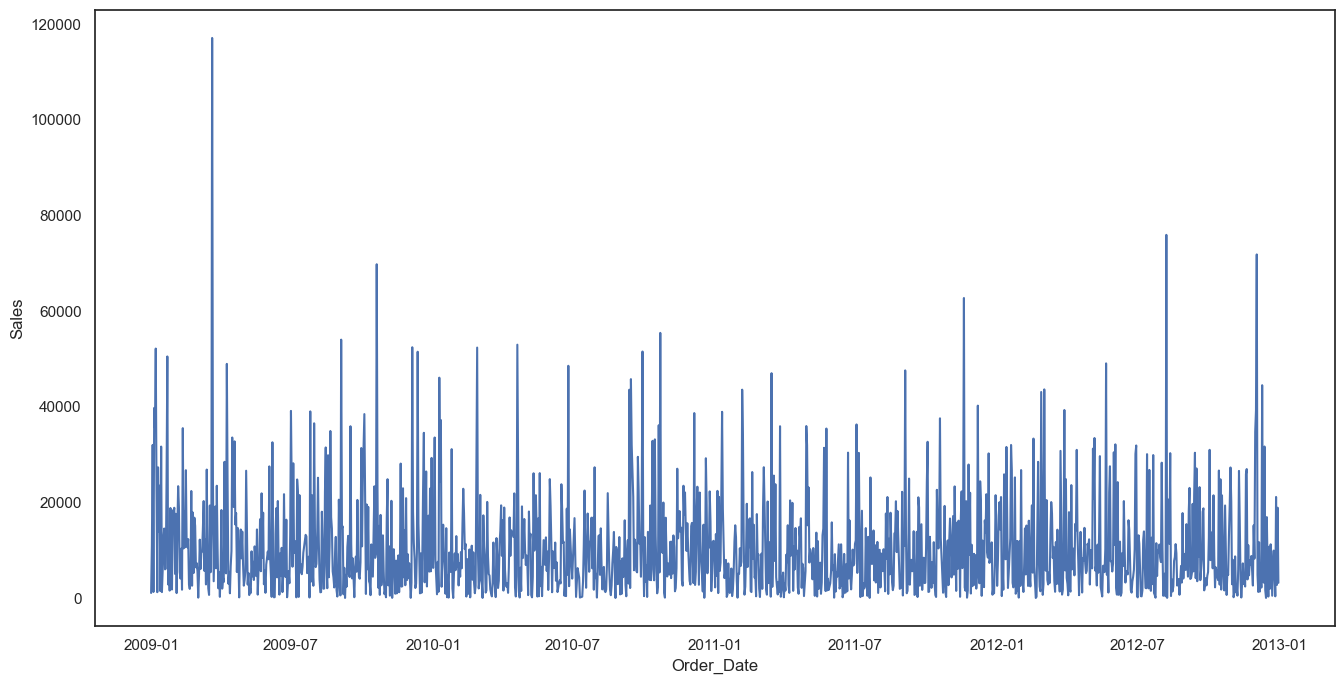

In [8]:
# time series plot

# figure size
plt.figure(figsize=(16, 8))

# tsplot
sns.lineplot(data=time_df)
plt.show()

### Using Derived Date Metrics for Visualisation

It is often helpful to use derived variables from date such as month and year and using them to identify hidden patterns.

In [24]:
# extracting month and year from date

# extract month
df['month'] = df['Order_Date'].dt.month

# extract year
df['year'] = df['Order_Date'].dt.year

df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Order_ID,Order_Date,Order_Priority,month,year
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,36262,2010-07-27,NOT SPECIFIED,7,2010
1,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,36262,2010-07-27,NOT SPECIFIED,7,2010
2,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,36262,2010-07-27,NOT SPECIFIED,7,2010
3,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,20513,2009-07-07,HIGH,7,2009
4,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,39682,2010-11-09,MEDIUM,11,2010


Now you can plot the average sales across years and months.

In [26]:
# grouping by year and month
df_time = df.groupby(["year", "month"]).Sales.mean().reset_index()

# Create a 'month_name' column for x-axis labels
df_time['month_name'] = pd.to_datetime(df_time[['year', 'month']].assign(day=1)).dt.strftime('%b-%Y')


df_time.head()

,year,month,Sales,month_name
0,2009,1,2315.259908,Jan-2009
1,2009,2,2187.372609,Feb-2009
2,2009,3,2225.020157,Mar-2009
3,2009,4,2286.491174,Apr-2009
4,2009,5,1264.535923,May-2009


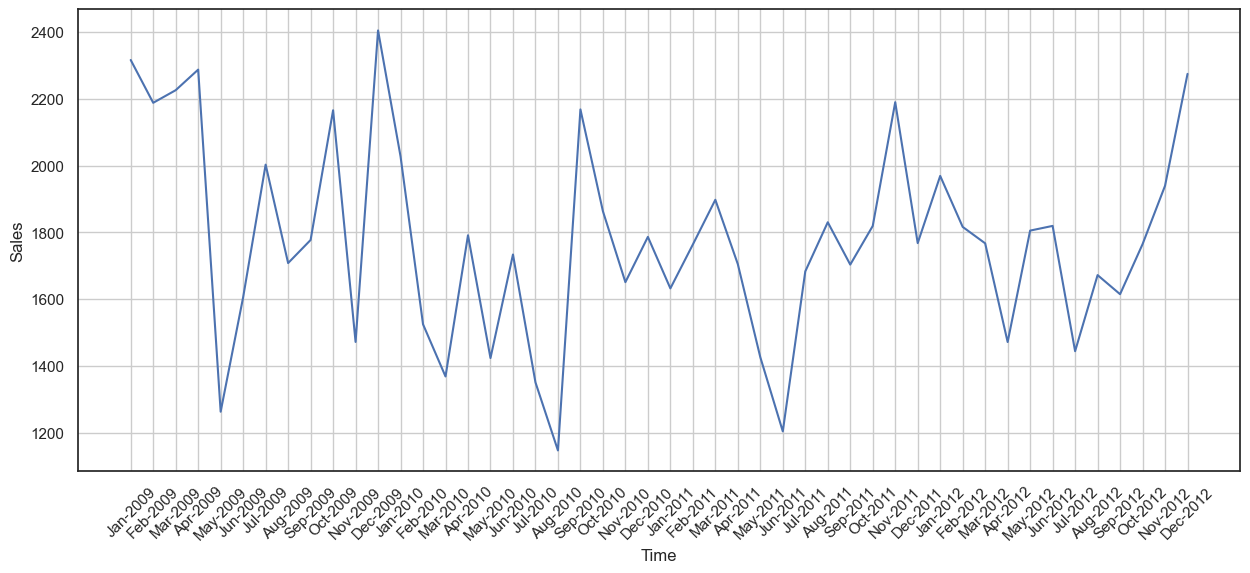

In [32]:
plt.figure(figsize=(15, 6))
# time series plot
sns.lineplot(df_time, x='month_name', y='Sales')
plt.xlabel("Time")
plt.ylabel("Sales")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

There is another way to visualise numeric variables, such as ```Sales```, across the year and month. We can pivot the ```month``` column to create a wide-format dataframe, and then plot a heatmap.


In [33]:
# Pivoting the data using 'month' 
year_month = pd.pivot_table(df, values='Sales', index='year', columns='month', aggfunc='mean')
year_month.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2009,2315.259908,2187.372609,2225.020157,2286.491174,1264.535923,1606.439439,2002.652474,1708.573653,1777.553631,2165.001596,1472.978852,2403.522257
2010,2027.269160,1525.733191,1369.861676,1791.735497,1424.795402,1734.205118,1352.267638,1148.823254,2167.581754,1863.530536,1651.536054,1786.863854
2011,1632.904078,1764.059653,1897.665840,1705.404716,1427.328783,1205.736863,1683.656061,1830.523197,1704.011086,1819.407446,2189.104143,1768.157605
2012,1968.939347,1816.661178,1767.554949,1472.664670,1805.577754,1819.611418,1445.295830,1672.624992,1615.591708,1765.058957,1939.546242,2273.777808


You can now create a heatmap using ```sns.heatmap()```.

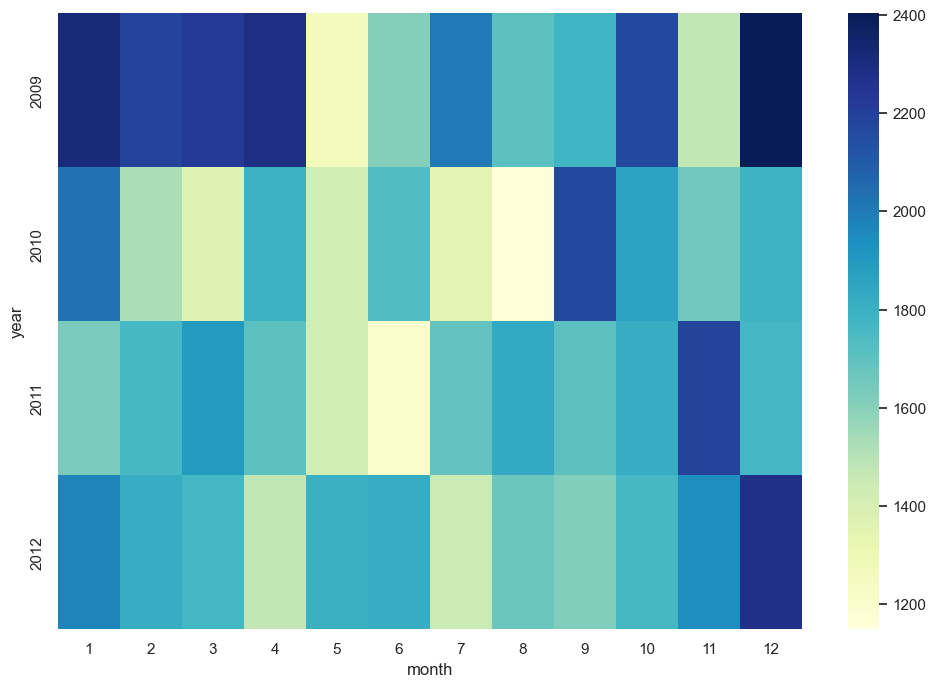

In [34]:
# figure size
plt.figure(figsize=(12, 8))

# heatmap with a color map of choice
sns.heatmap(year_month, cmap="YlGnBu")
plt.show()

### Addtional Reading on Time Series Plots and Heatmaps

1. <A href="https://seaborn.pydata.org/generated/seaborn.heatmap.html">Seaborn heatmaps (documentation)</a>
